In [1]:
import requests
import pandas as pd

In [3]:
api_key='2ed08fea6f2fb916c43db352bb9fe0e0';

In [13]:
# Example coordinates (Pune region)
lat = 18
lon = 74

api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}&units=metric"

# Send GET request
response = requests.get(api_url)
weather_data = response.json()

In [15]:
weather_data


{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1762776000,
   'main': {'temp': 24.23,
    'feels_like': 23.62,
    'temp_min': 22.71,
    'temp_max': 24.23,
    'pressure': 1012,
    'sea_level': 1012,
    'grnd_level': 924,
    'humidity': 35,
    'temp_kf': 1.52},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 4},
   'wind': {'speed': 1.87, 'deg': 22, 'gust': 1.92},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2025-11-10 12:00:00'},
  {'dt': 1762786800,
   'main': {'temp': 20.74,
    'feels_like': 20.02,
    'temp_min': 18.62,
    'temp_max': 20.74,
    'pressure': 1014,
    'sea_level': 1014,
    'grnd_level': 926,
    'humidity': 44,
    'temp_kf': 2.12},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 1},
   'wind': {'speed': 1.35, 'deg': 285, 'gust': 1.38},
   'visibility': 10000,
   'p

In [19]:
# Extract weather attributes
records = []
for item in weather_data['list']:
    records.append({
        'DateTime': item['dt_txt'],
        'Temperature': item['main']['temp'],
        'Humidity': item['main']['humidity'],
        'Wind Speed': item['wind']['speed']
    })

weather_df = pd.DataFrame(records)
weather_df.head()

,DateTime,Temperature,Humidity,Wind Speed
0,2025-11-10 12:00:00,24.23,35,1.87
1,2025-11-10 15:00:00,20.74,44,1.35
2,2025-11-10 18:00:00,17.26,57,1.34
3,2025-11-10 21:00:00,16.41,57,0.46
4,2025-11-11 00:00:00,15.38,57,0.84


In [21]:
avg_temp = weather_df['Temperature'].mean()
max_temp = weather_df['Temperature'].max()
min_temp = weather_df['Temperature'].min()

In [25]:
avg_temp,max_temp,min_temp

(20.00275, 25.6, 14.62)

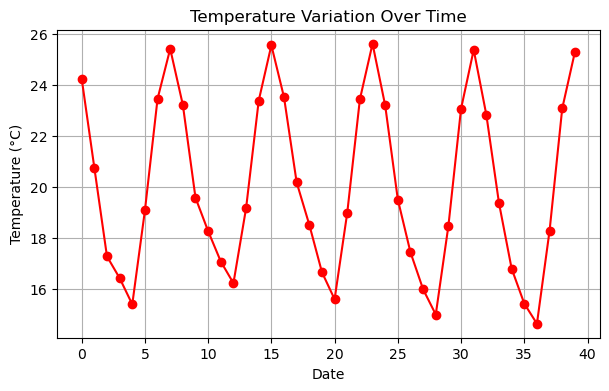

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(weather_df.index, weather_df['Temperature'], color='red', marker='o')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

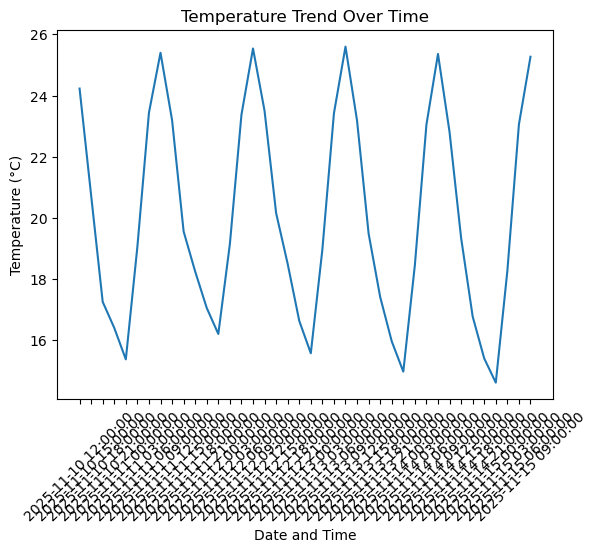

In [117]:
# Plot Temperature vs DateTime
plt.plot(weather_df['DateTime'], weather_df['Temperature'])

# Add title and labels
plt.title('Temperature Trend Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


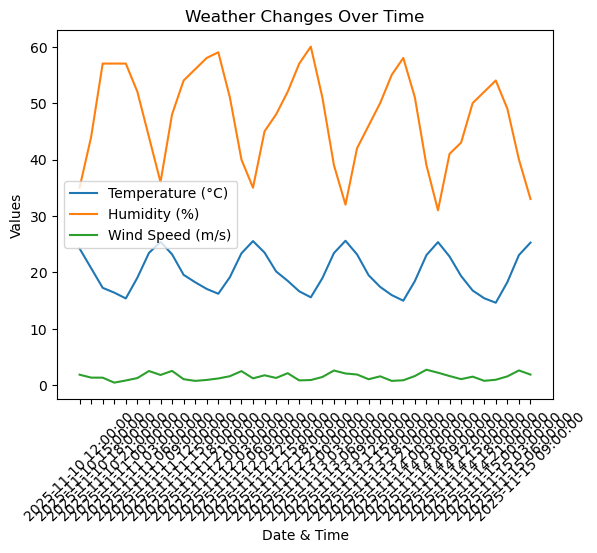

In [119]:
# Plot multiple weather features together
plt.plot(weather_df['DateTime'], weather_df['Temperature'], label='Temperature (°C)')
plt.plot(weather_df['DateTime'], weather_df['Humidity'], label='Humidity (%)')
plt.plot(weather_df['DateTime'], weather_df['Wind Speed'], label='Wind Speed (m/s)')
plt.title('Weather Changes Over Time')
plt.xlabel('Date & Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()
